In [1]:
from cobra.io import read_sbml_model
from cobra import Reaction
from cobra.flux_analysis.phenotype_phase_plane import production_envelope
model = read_sbml_model('iML1515.xml')

In [ ]:
for reaction in model.metabolites.gam_c.reactions:
    print(reaction.id, reaction, reaction.name)

In [ ]:
print(model.objective)

In [ ]:
model.optimize().fluxes["MC6PH"]

In [ ]:
model.medium

In [ ]:
model.reactions.EX_chtbs_e.lower_bound = -1000.0
model.reactions.EX_chtbs_e.upper_bound = 1000.0

In [ ]:
model.reactions.EX_chtbs_e

In [ ]:
medium = model.medium
with model:
    medium['EX_chtbs_e'] = 1000
    model.medium = medium
    # model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    model.objective = model.reactions.MC6PH
    model.objective = {
                      model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.2,
                      }
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = model.optimize().objective_value
    model.add_boundary(model.metabolites.gam_c, type='demand')
    solution = model.optimize()
    print(solution.fluxes[solution.fluxes != 0])
    print(solution.fluxes["MC6PH"])
    print(solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])
    print(model.reactions.DM_gam_c)

In [ ]:
# from cobra import Reaction
# medium = model.medium
# with model:
#     medium['EX_chtbs_e'] = 0
#     # gene integration
#     reaction = Reaction("asdf")
#     reaction.name = "name of reaction"
#     reaction.subsystem = "some metabolsim"
#     reaction.lower_bound = -1000
#     reaction.upper_bound = 1000

#     reaction.add_metabolites({
#         model.metabolites.get_by_id("glcn_c"): -1.0,
#         model.metabolites.get_by_id("gln__L_c"): -1.0,
#         model.metabolites.get_by_id("gam_c"): 1.0,
#         model.metabolites.get_by_id("glu__L_c"): 1.0
#     })
#     model.add_reactions([reaction])
#     model.medium = medium
#     model.objective = model.reactions.asdf
#     model.add_boundary(model.metabolites.gam_c, type='demand')
#     solution = model.optimize()
#     print(solution.fluxes[solution.fluxes != 0])
#     print(solution.fluxes["asdf"])

In [ ]:
model.genes.get_by_id("b4025")

In [ ]:
model.reactions.PGI

In [ ]:
model.slim_optimize()
model.reactions.PGI.flux

In [ ]:
model.reactions.GF6PTA

In [ ]:
model.slim_optimize()
model.reactions.GF6PTA.flux

In [ ]:
model.genes.get_by_id("b0677")

In [ ]:
model.reactions.AGDC

In [ ]:
model.genes.get_by_id("b0679")

In [ ]:
model.reactions.ACGAptspp.genes

In [ ]:
for reaction in model.metabolites.acgam6p_c.reactions:
    print(reaction.id, reaction, reaction.name)

In [ ]:
genes = ["b0677", "b0678", "b0679", "b1817", "b1818", "b1819"]
essentiality = {}
for gene in genes:
    with model:
        model.genes.get_by_id(gene).knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

In [ ]:
essentiality

Plotting KO growthrates. As seen, they don't have a detrimental effect on the growth rate.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')
df.plot.hist()

SHK3Dr                             0.171504
NDPK8                             -4.781045
DHORTS                            -0.148858
OMPDC                              0.148858
PYNP2r                             0.011775
                                    ...    
4HTHRK                             0.000301
BIOMASS_Ec_iML1515_core_75p37M     0.450000
ExRe1                             24.077781
ExRe2                             24.077781
DM_acgam_p                        24.077781
Name: fluxes, Length: 498, dtype: float64
GF6PTA 24.120300315607746
G6PDA 0.0
ACGAptspp 0.0
ExRe1 24.077780715607748
ExRe2 24.077780715607748
Biomass 0.45
  carbon_source  flux_minimum  carbon_yield_minimum  mass_yield_minimum  \
0   EX_glc__D_e      0.000000              0.000000                 NaN   
1   EX_glc__D_e      1.267252              0.077443                 NaN   
2   EX_glc__D_e      2.534503              0.154886                 NaN   
3   EX_glc__D_e      3.801755              0.232329          

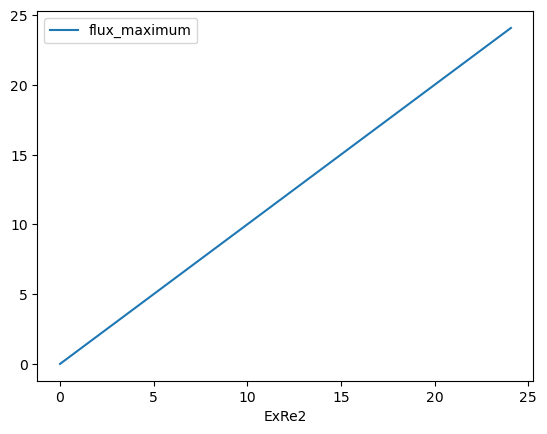

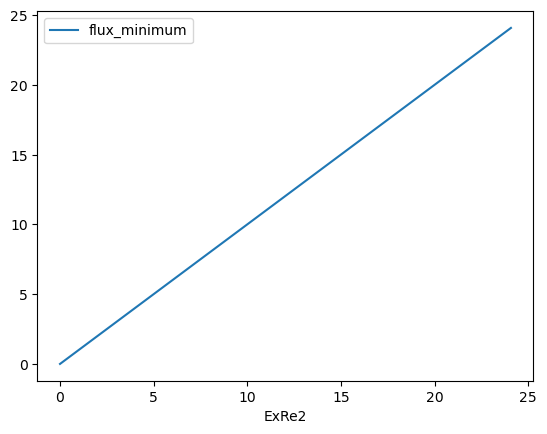

In [9]:
medium = model.medium
with model:
    medium['EX_glc__D_e'] = 30
    medium['EX_rib__D_e'] = 10
    #medium['EX_nh4_e'] = 10
    model.medium = medium
    model.genes.get_by_id("b0677").knock_out()
    model.genes.get_by_id("b0678").knock_out()
    model.genes.get_by_id("b0679").knock_out()
    model.genes.get_by_id("b1817").knock_out()
    model.genes.get_by_id("b1818").knock_out()
    model.genes.get_by_id("b1819").knock_out()
    model.genes.get_by_id("b1101").knock_out()
    model.genes.get_by_id("b2415").knock_out()
    model.genes.get_by_id("b2416").knock_out()
    model.genes.get_by_id("b2417").knock_out()
    # gene integration
    reaction = Reaction("ExRe1")
    reaction.name = "GlcNAc-6-P N-Acetyltransferase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000
    
    reaction.add_metabolites({
        model.metabolites.get_by_id("ac_c"): -1.0,
        model.metabolites.get_by_id("gam6p_c"): -1.0,
        model.metabolites.get_by_id("acgam6p_c"): 1.0,
        model.metabolites.get_by_id("h2o_c"): 1.0
    })
    model.add_reactions([reaction])
    reaction = Reaction("ExRe2")
    reaction.name = "GlcNAc-6-P phosphatase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000
    
    reaction.add_metabolites({
        model.metabolites.get_by_id("acgam6p_c"): -1.0,
        model.metabolites.get_by_id("pyr_c"): -1.0,
        model.metabolites.get_by_id("pep_c"): 1.0,
        model.metabolites.get_by_id("acgam_p"): 1.0
    })
    model.add_reactions([reaction])
    model.add_boundary(model.metabolites.acgam_p, type="demand")
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = 0.45
    model.objective = model.reactions.ExRe2
    solution = model.optimize()
    print(solution.fluxes[solution.fluxes != 0])
    print("GF6PTA", solution.fluxes["GF6PTA"])
    print("G6PDA", solution.fluxes["G6PDA"])
    print("ACGAptspp", solution.fluxes["ACGAptspp"])
    print("ExRe1", solution.fluxes["ExRe1"])
    print("ExRe2", solution.fluxes["ExRe2"])
    print("Biomass", solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])

    
    asdf = production_envelope(model, ["ExRe2"], objective="ExRe2", carbon_sources="EX_glc__D_e")
    print(asdf.head())
    asdf.plot(x='ExRe2', y='flux_maximum')
    asdf.plot(x="ExRe2", y= "flux_minimum")    